In [1]:
#libraries
import pandas as pd
from pandas.api.types import CategoricalDtype
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.mosaicplot import mosaic
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
#Read DataSet off of computer
df = pd.read_csv('C:/Users/jefft/Desktop/WGU Classes/D208/medical_clean.csv', index_col=0)

In [3]:
# get the dummies for mlr and store it in a variable
Gender_dummies = pd.get_dummies(df.Gender, dtype=int, drop_first=True)
Anxiety_dummies = pd.get_dummies(df.Anxiety, dtype=int)
Arthritis_dummies = pd.get_dummies(df.Arthritis, dtype=int, drop_first=True)
Diabetes_dummies = pd.get_dummies(df.Diabetes, dtype=int, drop_first=True)

In [4]:
# Convert specified columns from string to category
df["TimeZone"] = df["TimeZone"].astype("category")
df["Marital"] = df["Marital"].astype("category")
df["Gender"] = df["Gender"].astype("category")
df["Initial_admin"] = df["Initial_admin"].astype("category")
df["Complication_risk"] = df["Complication_risk"].astype("category")
df["Services"] = df["Services"].astype("category")

# Reformat the 'Income' column from float to integer
df["Income"] = df["Income"].astype(int)

# Reformat currency columns to 3 decimal places
df["TotalCharge"] = df["TotalCharge"].round(3)
df["Additional_charges"] = df["Additional_charges"].round(3)

# Define mapping for boolean conversion
bool_mapping = {"Yes": 1, "No": 0}

# Convert specified columns from string to boolean using the mapping
boolean_columns = ["ReAdmis", "Soft_drink", "HighBlood", "Stroke", "Overweight", 
                   "Arthritis", "Diabetes", "Hyperlipidemia", "BackPain", "Anxiety", 
                   "Allergic_rhinitis", "Reflux_esophagitis", "Asthma"]

for col in boolean_columns:
    df[col] = df[col].map(bool_mapping)

# Define mapping to reverse survey scores
survey_mapping = {1: 8, 2: 7, 3: 6, 4: 5, 5: 4, 6: 3, 7: 2, 8: 1}

# Define ordered categorical datatype for survey responses
survey_scores = CategoricalDtype(categories=["1", "2", "3", "4", "5", "6", "7", "8"], ordered=True)

# Reverse and convert survey score columns to ordered categorical datatype
survey_columns = ["Item1", "Item2", "Item3", "Item4", "Item5", "Item6", "Item7", "Item8"]

for col in survey_columns:
    df[col] = df[col].map(survey_mapping).map(str).astype(survey_scores)

In [5]:
df.BackPain.describe()


count    10000.000000
mean         0.411400
std          0.492112
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: BackPain, dtype: float64

In [6]:
df.BackPain.value_counts()

BackPain
0    5886
1    4114
Name: count, dtype: int64

In [7]:
df.Anxiety.describe()

count    10000.000000
mean         0.321500
std          0.467076
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: Anxiety, dtype: float64

In [8]:
df.Anxiety.value_counts().sort_index()

Anxiety
0    6785
1    3215
Name: count, dtype: int64

In [9]:
df.Initial_days.describe()

count    10000.000000
mean        34.455299
std         26.309341
min          1.001981
25%          7.896215
50%         35.836244
75%         61.161020
max         71.981490
Name: Initial_days, dtype: float64

In [10]:
df.Initial_days.nlargest()

CaseOrder
7969    71.98149
5327    71.96869
7480    71.96546
6167    71.96415
8067    71.96342
Name: Initial_days, dtype: float64

In [11]:
df.Initial_days.value_counts()

Initial_days
63.544320    2
67.421390    2
70.325420    2
63.334690    1
67.036510    1
            ..
5.977596     1
5.799041     1
6.415853     1
7.328631     1
70.850590    1
Name: count, Length: 9997, dtype: int64

In [12]:
df.Initial_days.nsmallest()

CaseOrder
1748    1.001981
2509    1.008401
4996    1.009143
4427    1.010068
4818    1.012481
Name: Initial_days, dtype: float64

In [13]:
df.Children.describe()

count    10000.000000
mean         2.097200
std          2.163659
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max         10.000000
Name: Children, dtype: float64

In [14]:
df.Children.value_counts().sort_index()

Children
0     2548
1     2509
2     1475
3     1489
4      995
5      169
6      191
7      213
8      209
9      108
10      94
Name: count, dtype: int64

In [15]:
df.Children.nsmallest()

CaseOrder
4     0
7     0
9     0
13    0
18    0
Name: Children, dtype: int64

In [16]:
df.Children.nlargest()

CaseOrder
17     10
157    10
181    10
186    10
220    10
Name: Children, dtype: int64

In [17]:
df.Age.describe()

count    10000.000000
mean        53.511700
std         20.638538
min         18.000000
25%         36.000000
50%         53.000000
75%         71.000000
max         89.000000
Name: Age, dtype: float64

In [18]:
df.Age.value_counts().sort_index()

Age
18    133
19    137
20    120
21    125
22    141
     ... 
85    135
86    156
87    136
88    143
89    132
Name: count, Length: 72, dtype: int64

In [19]:
df.Income.describe()

count     10000.000000
mean      40490.002100
std       28521.152883
min         154.000000
25%       19598.250000
50%       33768.000000
75%       54295.750000
max      207249.000000
Name: Income, dtype: float64

In [20]:
df.Income.nlargest()

CaseOrder
8387    207249
842     204542
8599    203774
6407    197675
1779    197576
Name: Income, dtype: int32

In [21]:
df.Income.nsmallest()

CaseOrder
822     154
9809    300
288     395
111     401
8659    493
Name: Income, dtype: int32

In [22]:
df.Gender.describe()

count      10000
unique         3
top       Female
freq        5018
Name: Gender, dtype: object

In [23]:
df.Gender.value_counts()

Gender
Female       5018
Male         4768
Nonbinary     214
Name: count, dtype: int64

In [24]:
df.VitD_levels.describe()

count    10000.000000
mean        17.964262
std          2.017231
min          9.806483
25%         16.626439
50%         17.951122
75%         19.347963
max         26.394449
Name: VitD_levels, dtype: float64

In [25]:
df.Arthritis.describe()

count    10000.000000
mean         0.357400
std          0.479258
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: Arthritis, dtype: float64

In [26]:
df.Arthritis.value_counts()

Arthritis
0    6426
1    3574
Name: count, dtype: int64

In [27]:
df.Diabetes.describe()

count    10000.00000
mean         0.27380
std          0.44593
min          0.00000
25%          0.00000
50%          0.00000
75%          1.00000
max          1.00000
Name: Diabetes, dtype: float64

In [28]:
df.Diabetes.value_counts()

Diabetes
0    7262
1    2738
Name: count, dtype: int64

In [29]:
df.TotalCharge.describe()

count    10000.000000
mean      5312.172766
std       2180.393840
min       1938.312000
25%       3179.374000
50%       5213.952000
75%       7459.699750
max       9180.728000
Name: TotalCharge, dtype: float64

In [30]:
df.TotalCharge.nlargest()

CaseOrder
5713    9180.728
8988    9169.248
5501    9080.912
9404    9077.388
5462    9067.605
Name: TotalCharge, dtype: float64

In [31]:
df.TotalCharge.nsmallest()

CaseOrder
2509    1938.312
3655    1957.446
2496    1969.472
4213    2000.776
3086    2004.755
Name: TotalCharge, dtype: float64

In [32]:
df.Doc_visits.describe()

count    10000.000000
mean         5.012200
std          1.045734
min          1.000000
25%          4.000000
50%          5.000000
75%          6.000000
max          9.000000
Name: Doc_visits, dtype: float64

In [33]:
df.Doc_visits.nlargest()


CaseOrder
963     9
2767    9
240     8
597     8
620     8
Name: Doc_visits, dtype: int64

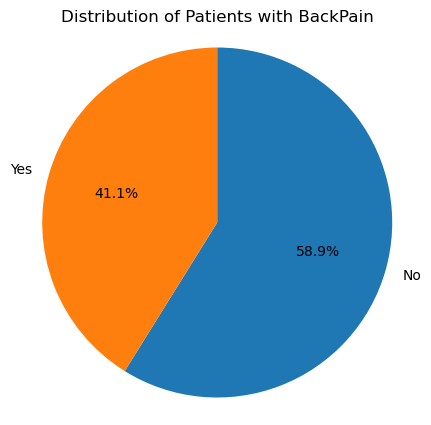

In [34]:
##Univariate and Bivariate Distributions
# Dependent
plt.figure(figsize = [16,5])
plt.title('Distribution of Patients with BackPain')
back_pain_counts = df.BackPain.value_counts()
back_pain_labels = ["No", "Yes"]
plt.pie(back_pain_counts, labels=back_pain_labels, autopct='%1.1f%%', startangle=90, counterclock=False)
plt.axis('square');


<Figure size 1600x500 with 0 Axes>

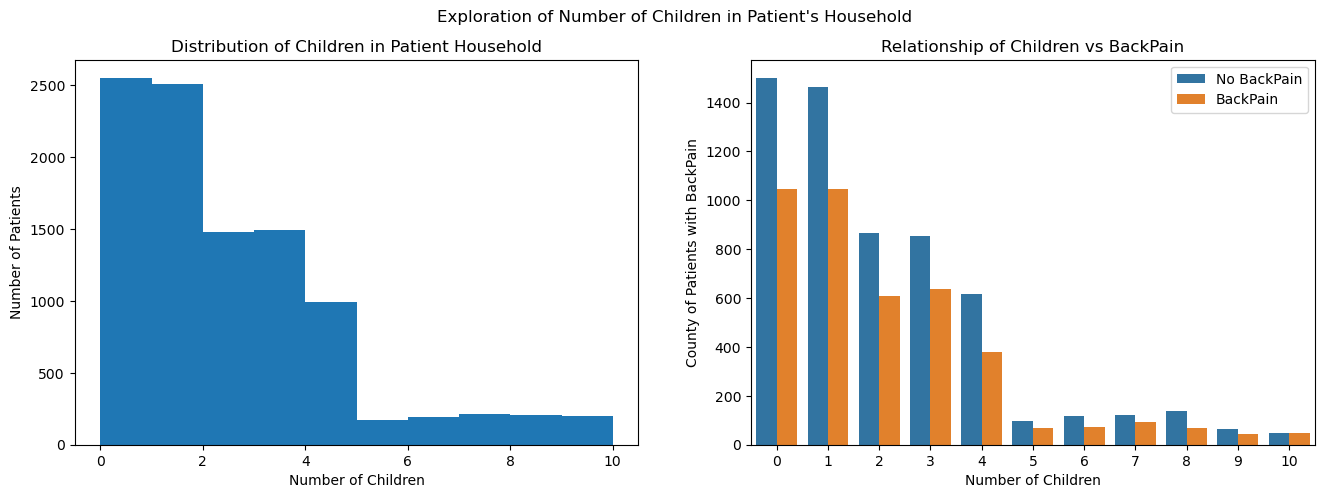

In [35]:
plt.figure(figsize = [16,5])
plt.suptitle("Exploration of Number of Children in Patient's Household")

plt.figure(figsize = [16,5])
plt.suptitle("Exploration of Number of Children in Patient's Household")
plt.subplot(1, 2, 1)
plt.title('Distribution of Children in Patient Household')
bins = np.arange(0, df.Children.max() + 1, 1)
plt.hist(data=df, x="Children", bins=bins)
plt.xlabel('Number of Children')
plt.ylabel("Number of Patients");

plt.subplot(1, 2, 2)
plt.title("Relationship of Children vs BackPain")
sns.countplot(data = df, x="Children", hue="BackPain")
plt.legend(["No BackPain", "BackPain"])
plt.xlabel("Number of Children")
plt.ylabel("County of Patients with BackPain");

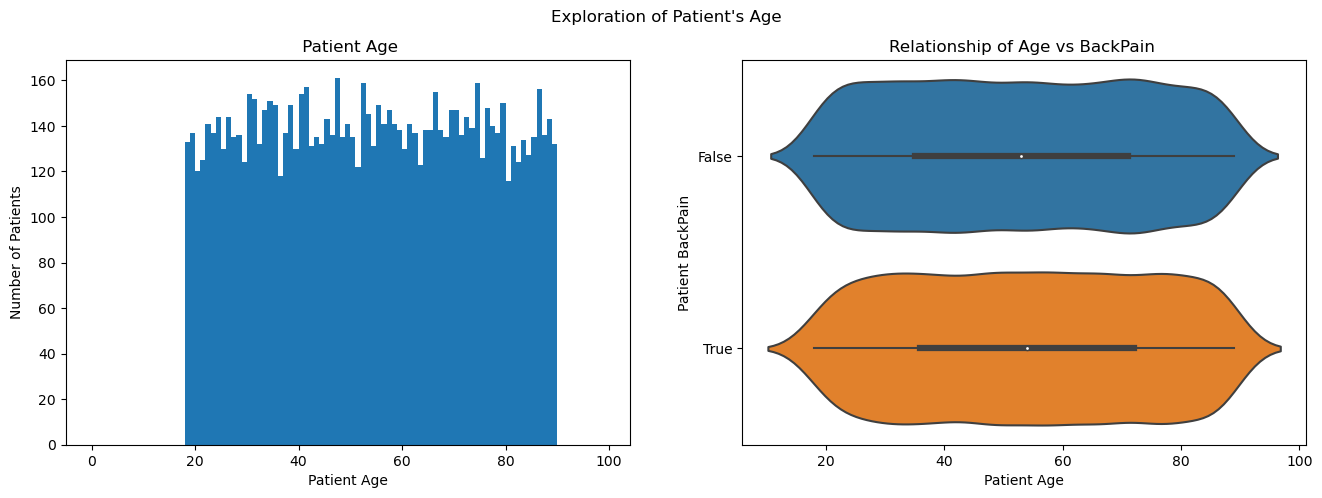

In [36]:


plt.figure(figsize = [16,5])
plt.suptitle("Exploration of Patient's Age")
plt.subplot(1, 2, 1)
plt.title(' Patient Age')
bins = np.arange(0, 100, 1)
plt.hist(data=df, x="Age", bins=bins)
plt.xlabel('Patient Age')
plt.ylabel("Number of Patients");


plt.subplot(1, 2, 2)
plt.title("Relationship of Age vs BackPain ")
sns.violinplot(data = df, x="Age", y="BackPain", orient='h')
plt.xlabel("Patient Age")
plt.ylabel("Patient BackPain")
plt.yticks([0,1], ["False", "True"]);

C:\Users\jefft\anaconda3\envs\JeffPandasNumpy\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\jefft\anaconda3\envs\JeffPandasNumpy\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


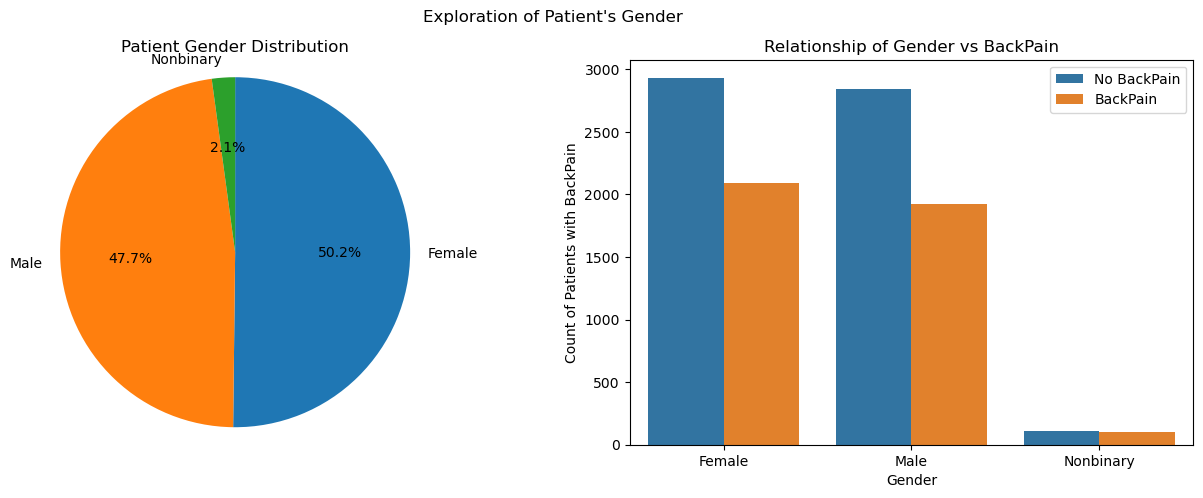

In [37]:
plt.figure(figsize = [16,5])
plt.suptitle("Exploration of Patient's Gender")
plt.subplot(1, 2, 1)
plt.title("Patient Gender Distribution")
gender_counts = df["Gender"].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, counterclock = False)
plt.axis('square');
plt.subplot(1, 2, 2)


plt.subplot(1, 2, 2)
plt.title("Relationship of Gender vs BackPain")
sns.countplot(data = df, x="Gender", hue="BackPain")
plt.legend(["No BackPain", "BackPain"])
plt.xlabel("Gender")
plt.ylabel("Count of Patients with BackPain");

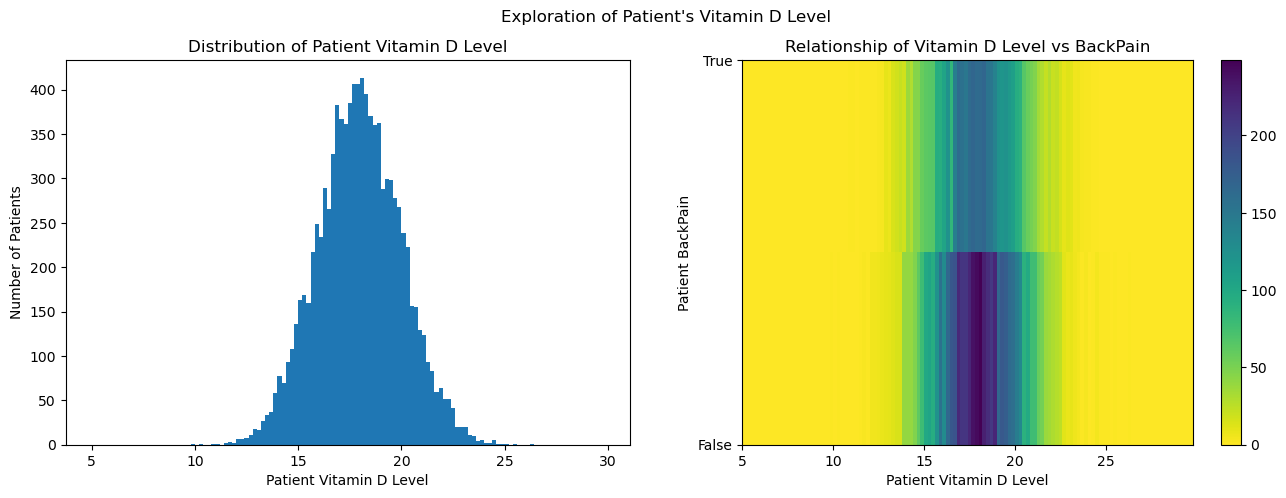

In [38]:
plt.figure(figsize = [16,5])
plt.suptitle("Exploration of Patient's Vitamin D Level")
plt.subplot(1, 2, 1)
plt.title('Distribution of Patient Vitamin D Level')
bins = np.arange(5, 30, 0.20)
plt.hist(data=df, x="VitD_levels", bins=bins)
plt.xlabel('Patient Vitamin D Level')
plt.ylabel("Number of Patients");


plt.subplot(1, 2, 2)
plt.title("Relationship of Vitamin D Level vs BackPain")
bins_y = np.arange(0, 1.25, 0.5)
plt.hist2d(data=df, x="VitD_levels", y="BackPain", bins=[bins, bins_y], cmap= "viridis_r")
plt.colorbar()
plt.xlabel("Patient Vitamin D Level")
plt.ylabel("Patient BackPain")
plt.yticks([0,1], ["False", "True"]);


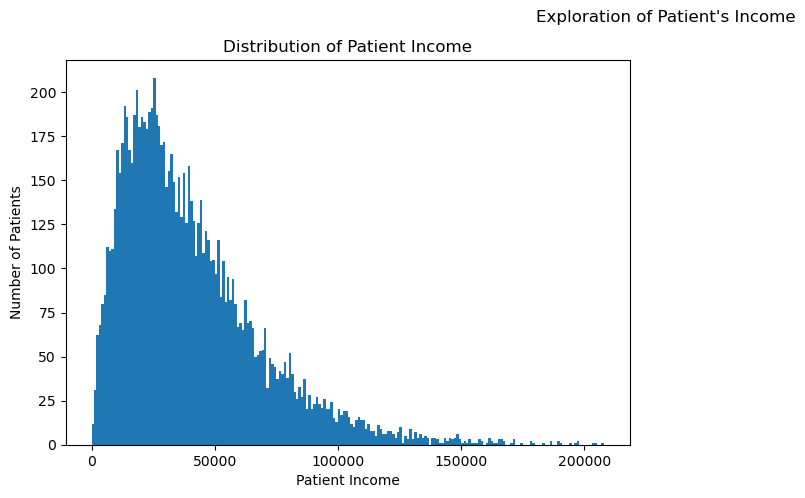

In [39]:
plt.figure(figsize = [16,5])
plt.suptitle("Exploration of Patient's Income")
plt.subplot(1, 2, 1)
plt.title('Distribution of Patient Income')
bins = np.arange(0,df.Income.max() + 1000, 1000)
plt.hist(data=df, x="Income", bins=bins)
plt.xlabel('Patient Income')
plt.ylabel("Number of Patients");

C:\Users\jefft\anaconda3\envs\JeffPandasNumpy\Lib\site-packages\IPython\core\events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Users\jefft\anaconda3\envs\JeffPandasNumpy\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


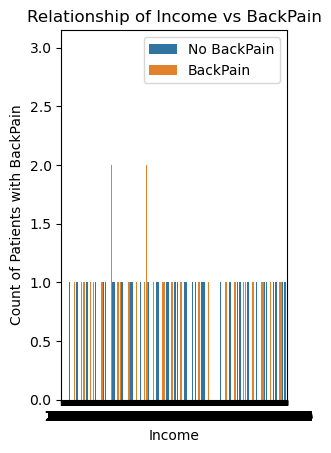

In [40]:
plt.subplot(1, 2, 2)
plt.title("Relationship of Income vs BackPain")
sns.countplot(data = df, x="Income", hue="BackPain")
plt.legend(["No BackPain", "BackPain"])
plt.xlabel("Income")
plt.ylabel("Count of Patients with BackPain");

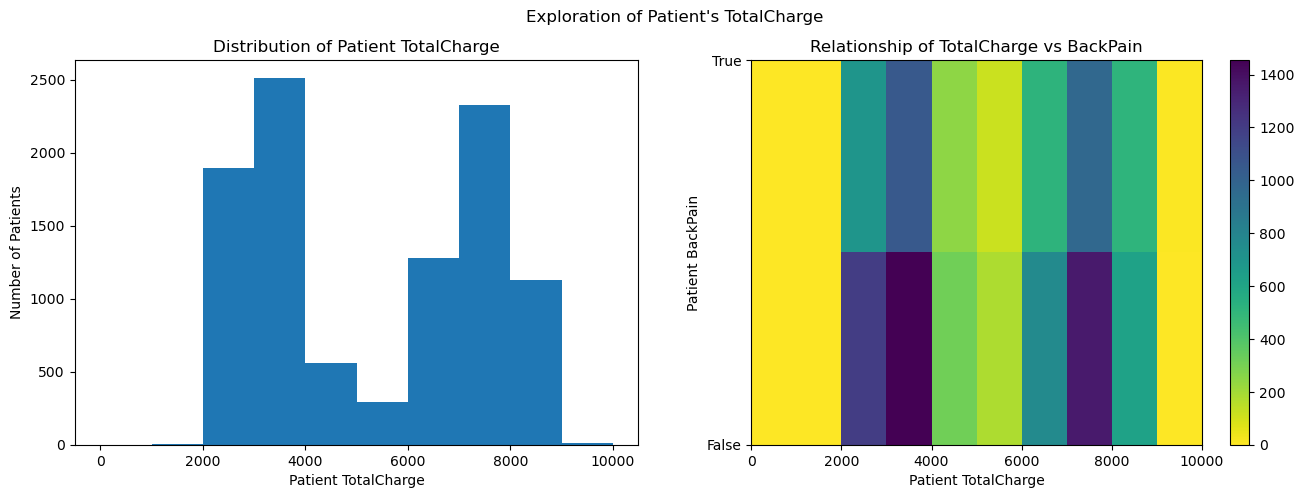

In [41]:
plt.figure(figsize = [16,5])
plt.suptitle("Exploration of Patient's TotalCharge")
plt.subplot(1, 2, 1)
plt.title('Distribution of Patient TotalCharge')
bins = np.arange(0,df.TotalCharge.max() + 1000, 1000)
plt.hist(data=df, x="TotalCharge", bins=bins)
plt.xlabel('Patient TotalCharge')
plt.ylabel("Number of Patients");


plt.subplot(1, 2, 2)
plt.title("Relationship of TotalCharge vs BackPain")
bins_y = np.arange(0, 1.25, 0.5)
plt.hist2d(data=df, x="TotalCharge", y="BackPain", bins=[bins, bins_y], cmap= "viridis_r")
plt.colorbar()
plt.xlabel("Patient TotalCharge")
plt.ylabel("Patient BackPain")
plt.yticks([0,1], ["False", "True"]);

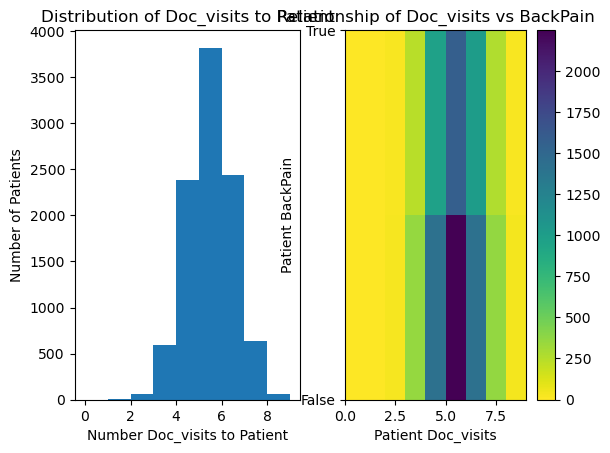

In [42]:

plt.subplot(1, 2, 1)
plt.title('Distribution of Doc_visits to Patient')
bins = np.arange(0, 10, 1)
plt.hist(data=df, x="Doc_visits", bins=bins)
plt.xlabel('Number Doc_visits to Patient')
plt.ylabel("Number of Patients");
plt.subplot(1, 2, 2)
plt.title("Relationship of Doc_visits vs BackPain")
bins_y = np.arange(0, 1.25, 0.5)
plt.hist2d(data=df, x="Doc_visits", y="BackPain", bins=[bins, bins_y], cmap= "viridis_r")
plt.colorbar()
plt.xlabel("Patient Doc_visits")
plt.ylabel("Patient BackPain")
plt.yticks([0,1], ["False", "True"]);

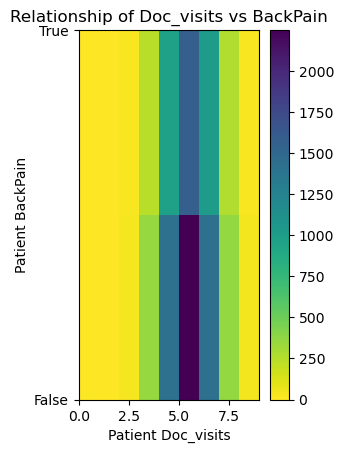

In [43]:
plt.subplot(1, 2, 2)
plt.title("Relationship of Doc_visits vs BackPain")
bins_y = np.arange(0, 1.25, 0.5)
plt.hist2d(data=df, x="Doc_visits", y="BackPain", bins=[bins, bins_y], cmap= "viridis_r")
plt.colorbar()
plt.xlabel("Patient Doc_visits")
plt.ylabel("Patient BackPain")
plt.yticks([0,1], ["False", "True"]);

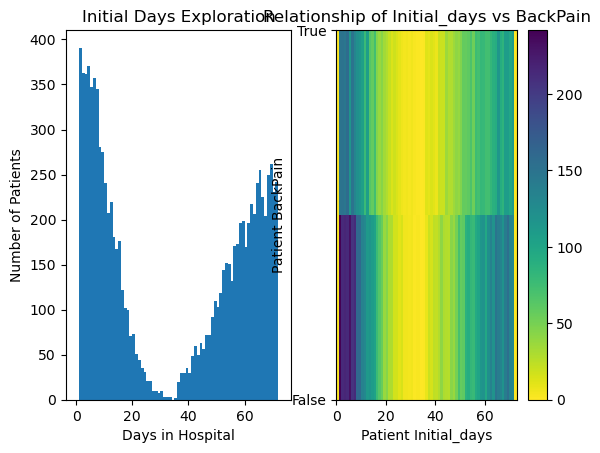

In [44]:
plt.subplot(1, 2, 1)
plt.title('Initial Days Exploration')
bins = np.arange(0, 74, 1)
plt.hist(data=df, x="Initial_days", bins=bins)
plt.xlabel('Days in Hospital')
plt.ylabel("Number of Patients");


plt.subplot(1, 2, 2)
plt.title("Relationship of Initial_days vs BackPain")
bins_y = np.arange(0, 1.25, 0.5)
plt.hist2d(data=df, x="Initial_days", y="BackPain", bins=[bins, bins_y], cmap= "viridis_r")
plt.colorbar()
plt.xlabel("Patient Initial_days")
plt.ylabel("Patient BackPain")
plt.yticks([0,1], ["False", "True"]);

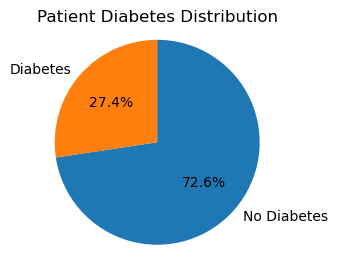

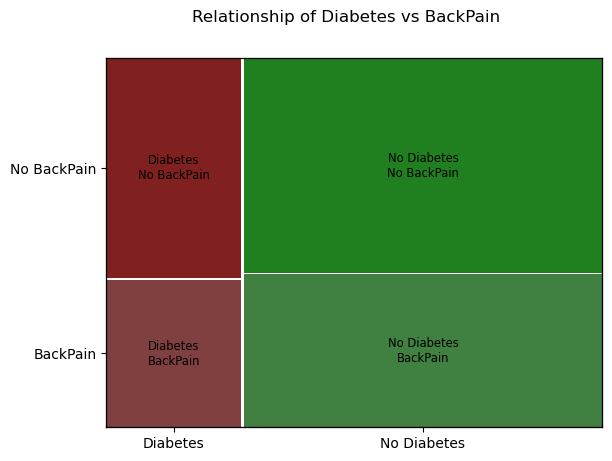

In [45]:

plt.subplot(1, 2, 1)
plt.title("Patient Diabetes Distribution")
diabetes_counts = df["Diabetes"].value_counts().sort_index()
plt.pie(diabetes_counts, labels=["No Diabetes", "Diabetes"], autopct='%1.1f%%', startangle=90, counterclock = False)
plt.axis('square');


temp_df = df[["Diabetes", "BackPain"]].copy()
diabetes_map = {1 : "Diabetes", 0: "No Diabetes"}
BackPain_map = {1 : "BackPain", 0: "No BackPain"}
temp_df["Diabetes"] = temp_df["Diabetes"].map(diabetes_map)
temp_df["BackPain"] = temp_df["BackPain"].map(BackPain_map)
mosaic(temp_df, ["Diabetes", "BackPain"])
plt.suptitle("Relationship of Diabetes vs BackPain");

In [46]:
#Creating data frame of variables that werent categorical and didnt need dummy variables
num_features = df[["Children", "Age", "VitD_levels", "Doc_visits","Income","TotalCharge","Initial_days"]]
features = pd.concat([num_features, Gender_dummies,Arthritis_dummies,Diabetes_dummies], axis="columns")
#Clean Data Set

features.to_csv('output208CleanTask2.csv', index=False)

In [47]:
#Renaming Columns
Arthritis_dummies = Arthritis_dummies.rename(columns = {"Yes": 'Arthritis1',})
Arthritis_dummies

,Arthritis1
CaseOrder,
1,1
2,0
3,0
4,1
5,0
...,...
9996,0
9997,1
9998,0


In [48]:
Diabetes_dummies = Diabetes_dummies.rename(columns = {"Yes": 'Diabetes1',})
Diabetes_dummies

,Diabetes1
CaseOrder,
1,1
2,0
3,1
4,0
5,0
...,...
9996,0
9997,1
9998,0


In [49]:
Gender_dummies

,Male,Nonbinary
CaseOrder,,
1,1,0
2,0,0
3,0,0
4,1,0
5,0,0
...,...,...
9996,1,0
9997,1,0
9998,0,0


In [50]:
Anxiety_dummies = Anxiety_dummies.rename(columns = {"No": 'No_Anxiety', "Yes": 'Yes_Anxiety'})
Anxiety_dummies

,No_Anxiety,Yes_Anxiety
CaseOrder,,
1,0,1
2,1,0
3,1,0
4,1,0
5,1,0
...,...,...
9996,0,1
9997,1,0
9998,0,1


In [51]:
num_features = df[["Children", "Age", "VitD_levels", "Doc_visits","Income","TotalCharge","Initial_days"]]
features = pd.concat([num_features, Gender_dummies,Arthritis_dummies,Diabetes_dummies,], axis="columns")
vif_df = pd.DataFrame()
vif_df["features"] = features.columns
vif_df["VIF"] = [variance_inflation_factor(features.values, i) for i in range(len(features.columns))]
vif_df

,features,VIF
0,Children,1.935872
1,Age,7.452367
2,VitD_levels,43.108564
3,Doc_visits,20.915758
4,Income,2.971755
5,TotalCharge,200.778204
6,Initial_days,81.246944
7,Male,1.933999
8,Nonbinary,1.042862
9,Arthritis1,1.570248


In [52]:
num_features = df[["Children", "Age", "Doc_visits","Income","Initial_days"]]
features = pd.concat([num_features, Gender_dummies,Arthritis_dummies,Diabetes_dummies,], axis="columns")
vif_df = pd.DataFrame()
vif_df["features"] = features.columns
vif_df["VIF"] = [variance_inflation_factor(features.values, i) for i in range(len(features.columns))]
vif_df

,features,VIF
0,Children,1.899110
1,Age,6.362165
2,Doc_visits,9.222691
3,Income,2.857059
4,Initial_days,2.599001
5,Male,1.893881
6,Nonbinary,1.040772
7,Arthritis1,1.537302
8,Diabetes1,1.367511


In [53]:
#Initial Logistic Regression Model
y = df.BackPain
X = features.assign(const=1)
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.676331
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:               BackPain   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9990
Method:                           MLE   Df Model:                            9
Date:                Sat, 15 Jun 2024   Pseudo R-squ.:                0.001524
Time:                        12:33:21   Log-Likelihood:                -6763.3
converged:                       True   LL-Null:                       -6773.6
Covariance Type:            nonrobust   LLR p-value:                   0.01429
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Children        -0.0076      0.009     -0.802      0.423      -0.026       0.011
Age              0.0021

In [54]:
num_features = df[["Children", "Age", "Income","Initial_days"]]
features = pd.concat([num_features, Gender_dummies,Arthritis_dummies,Diabetes_dummies,], axis="columns")
y = df.BackPain
X = features.assign(const=1)
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.676367
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:               BackPain   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9991
Method:                           MLE   Df Model:                            8
Date:                Sat, 15 Jun 2024   Pseudo R-squ.:                0.001472
Time:                        12:33:24   Log-Likelihood:                -6763.7
converged:                       True   LL-Null:                       -6773.6
Covariance Type:            nonrobust   LLR p-value:                   0.01055
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Children        -0.0076      0.009     -0.804      0.422      -0.026       0.011
Age              0.0021

In [55]:
num_features = df[[ "Age", "Income","Initial_days"]]
features = pd.concat([num_features, Gender_dummies,Arthritis_dummies,Diabetes_dummies,], axis="columns")
y = df.BackPain
X = features.assign(const=1)
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.676399
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:               BackPain   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9992
Method:                           MLE   Df Model:                            7
Date:                Sat, 15 Jun 2024   Pseudo R-squ.:                0.001424
Time:                        12:33:25   Log-Likelihood:                -6764.0
converged:                       True   LL-Null:                       -6773.6
Covariance Type:            nonrobust   LLR p-value:                  0.007309
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Age              0.0021      0.001      2.084      0.037       0.000       0.004
Income        7.245e-07

In [56]:
num_features = df[[ "Age","Initial_days"]]
features = pd.concat([num_features, Gender_dummies,Arthritis_dummies,Diabetes_dummies,], axis="columns")
y = df.BackPain
X = features.assign(const=1)
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.676451
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:               BackPain   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9993
Method:                           MLE   Df Model:                            6
Date:                Sat, 15 Jun 2024   Pseudo R-squ.:                0.001348
Time:                        12:33:28   Log-Likelihood:                -6764.5
converged:                       True   LL-Null:                       -6773.6
Covariance Type:            nonrobust   LLR p-value:                  0.005611
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Age              0.0020      0.001      2.072      0.038       0.000       0.004
Initial_days     0.0013

In [57]:
num_features = df[[ "Age","Initial_days"]]
features = pd.concat([num_features, Gender_dummies.Nonbinary,Arthritis_dummies,Diabetes_dummies,], axis="columns")
y = df.BackPain
X = features.assign(const=1)
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.676532
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:               BackPain   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9994
Method:                           MLE   Df Model:                            5
Date:                Sat, 15 Jun 2024   Pseudo R-squ.:                0.001229
Time:                        12:33:31   Log-Likelihood:                -6765.3
converged:                       True   LL-Null:                       -6773.6
Covariance Type:            nonrobust   LLR p-value:                  0.005214
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Age              0.0021      0.001      2.093      0.036       0.000       0.004
Initial_days     0.0013

In [58]:
num_features = df[[ "Age","Initial_days"]]
features = pd.concat([num_features, Gender_dummies.Nonbinary,Arthritis_dummies], axis="columns")
y = df.BackPain
X = features.assign(const=1)
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.676619
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:               BackPain   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9995
Method:                           MLE   Df Model:                            4
Date:                Sat, 15 Jun 2024   Pseudo R-squ.:                0.001100
Time:                        12:33:33   Log-Likelihood:                -6766.2
converged:                       True   LL-Null:                       -6773.6
Covariance Type:            nonrobust   LLR p-value:                  0.004913
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Age              0.0021      0.001      2.088      0.037       0.000       0.004
Initial_days     0.0013

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
final_matrix = confusion_matrix(y_test, y_pred)
print(final_matrix)

Accuracy of logistic regression classifier on test set: 0.58
[[1726   13]
 [1255    6]]


In [60]:
result.params

Age             0.002058
Initial_days    0.001337
Nonbinary       0.272265
Arthritis1     -0.083062
const          -0.491065
dtype: float64

In [61]:
print(f"The odds ratio for age is {round(np.exp(0.002058), 4)}. Given this, the change in odds for back pain is {round((np.exp(0.002058) - 1) * 100, 4)}")
print(f"The odds ratio for Initial_days is {round(np.exp(0.001337), 4)}. Given this, the change in odds for back pain is {round((np.exp(0.001337) - 1) * 100, 4)}")
print(f"The odds ratio for Nonbinary  is {round(np.exp( 0.272265), 4)}. Given this, the change in odds for back pain is {round((np.exp(0.272265) - 1) * 100, 4)}")
print(f"The odds ratio for days Arthritis1  is {round(np.exp(-0.083062), 4)}. Given this, the change in odds for back pain is {round((np.exp(-0.083062) - 1) * 100, 4)}")

The odds ratio for age is 1.0021. Given this, the change in odds for back pain is 0.206
The odds ratio for Initial_days is 1.0013. Given this, the change in odds for back pain is 0.1338
The odds ratio for Nonbinary  is 1.3129. Given this, the change in odds for back pain is 31.2935
The odds ratio for days Arthritis1  is 0.9203. Given this, the change in odds for back pain is -7.9706
